# **Part B**

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from tensorflow.keras.utils import to_categorical

2024-06-11 16:34:37.777597: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 16:34:37.777716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 16:34:37.886417: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
X_train


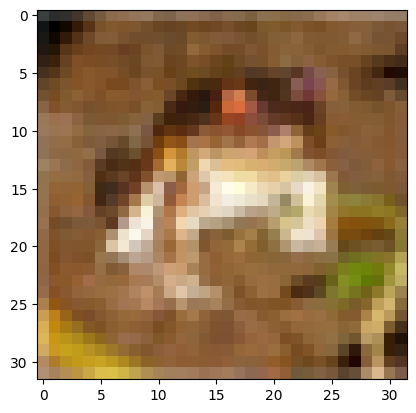

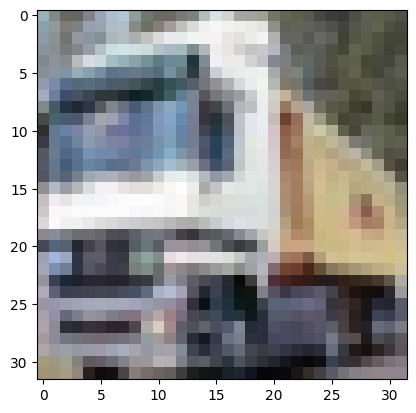

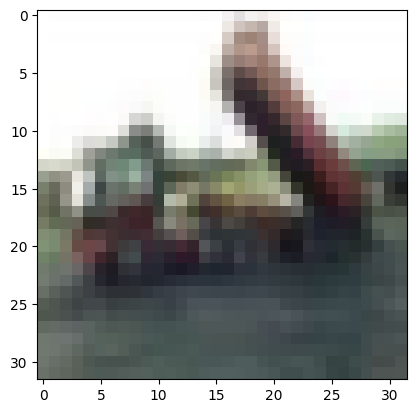

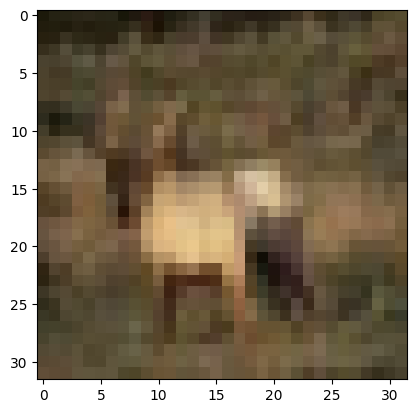

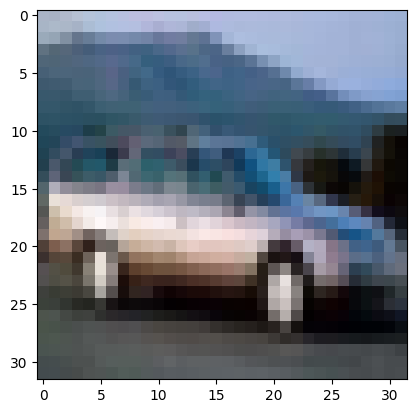

X_test


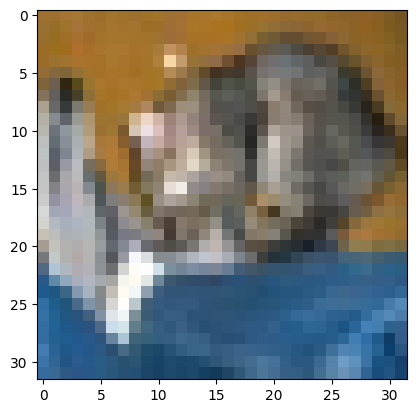

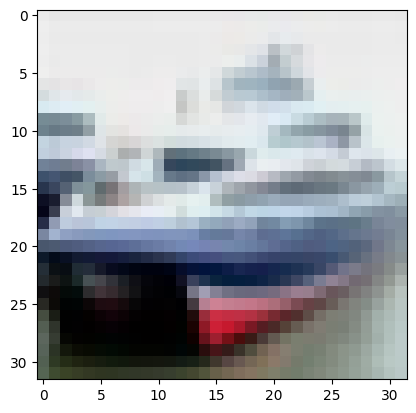

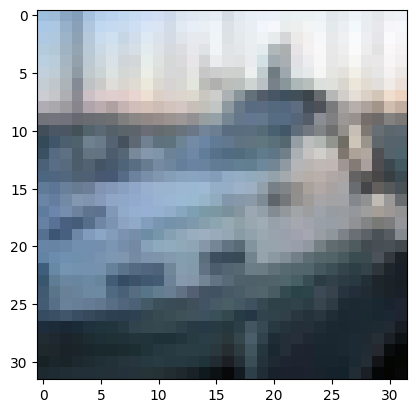

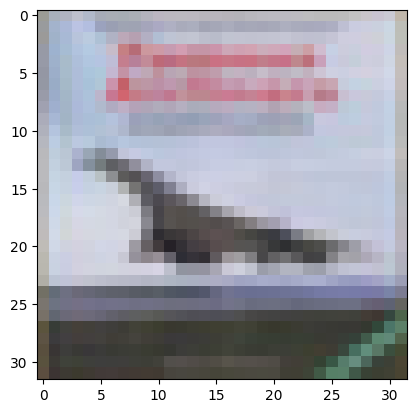

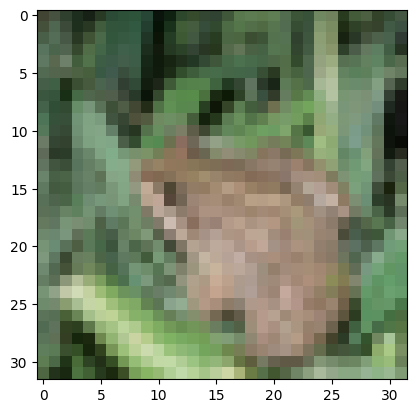

In [2]:
#dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
# X_train_1=[]
X_test_1=[]
# X_test_2=[]
Y_test_1=[]
X_test_1=X_test
Y_test_1=Y_test

# test=X_test
# print(test.shape)

# for img in test:
#     img=cv2.resize(img,(150,150))
#     X_test_2.append(img/255)
    
# X_test_2 , Y_test_2=np.array(X_test_2), np.array(Y_test_2)
    
# for img in X_train:
#   img=cv2.resize(img,(150,150))
#   X_train_1.append(img)
# for img in X_test:
#   img=cv2.resize(img,(150,150))
#   X_test_1.append(img)

# X_train=X_train_1
# X_test=X_test_1

print("X_train")
for img in X_train[0:5]:
  plt.imshow(img)
  plt.show()

print("X_test")
for img in X_test[0:5]:
  plt.imshow(img)
  plt.show()

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [3]:
len(np.unique(Y_train))

10

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(10000, 32, 32, 3)
(35000, 1)
(15000, 1)
(10000, 1)
4
2


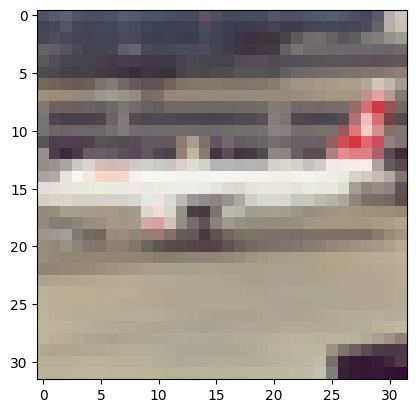

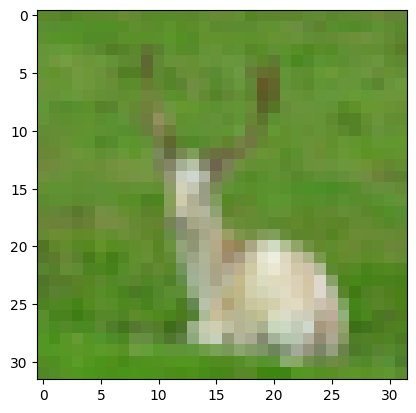

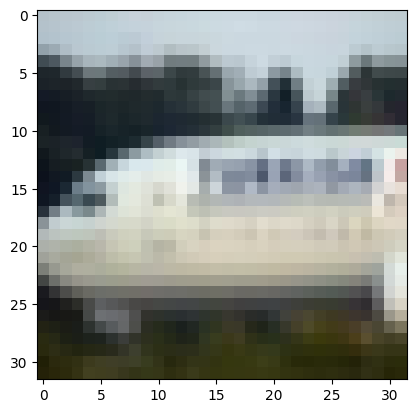

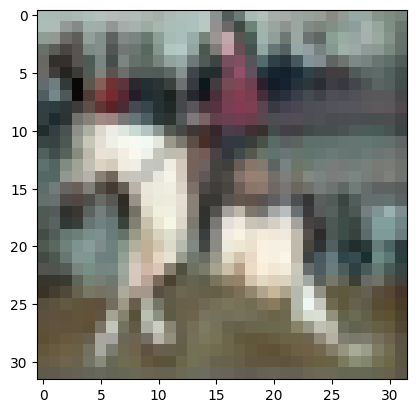

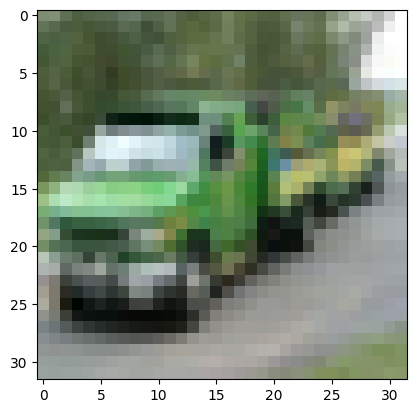

In [4]:
#printing sample images
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test_1 ,Y_test_1=np.array(X_test_1), np.array(Y_test_1)

print(X_train.shape)
print(X_test.shape)
print(X_test_1.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_test_1.shape)

print(np.ndim(X_train))
print(np.ndim(Y_train))

for i in range (0,5):
  plt.imshow(X_test[i])
  plt.show()


In [5]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)
Y_test_1=tf.keras.utils.to_categorical(Y_test_1)

In [6]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_test_1.shape)

(35000, 10)
(15000, 10)
(10000, 10)


You have learnt about data augmentation in the theoretical assignment, Now you need to use it in the above dataset (You can do it using ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator (
    rotation_range = 30,
    rescale = 1./255,

    shear_range = 0.1,
    zoom_range = 0.2,

    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
batch_size = 32
train_gen = train_datagen.flow(
    X_train, Y_train,
    batch_size=batch_size
)
val_gen = val_datagen.flow(
    X_test, Y_test,
    batch_size=batch_size
)


Use Visualization libraries to see how data augmentation works.

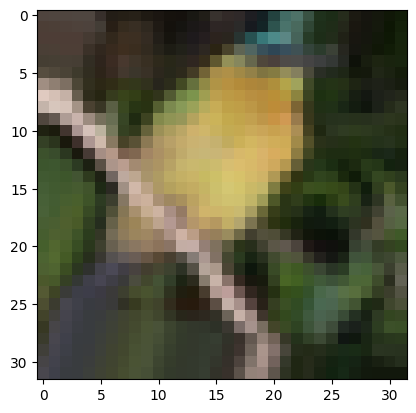

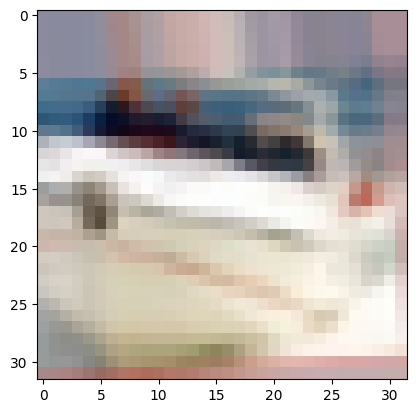

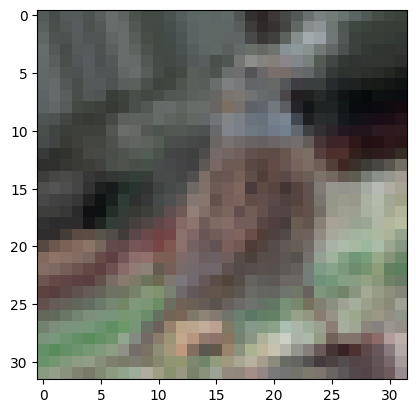

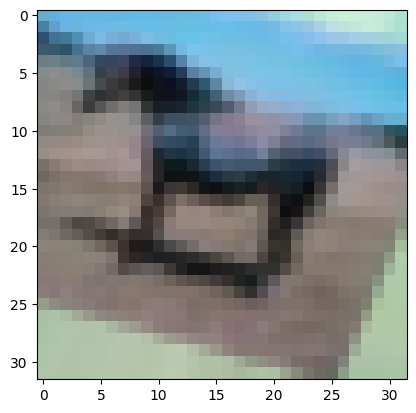

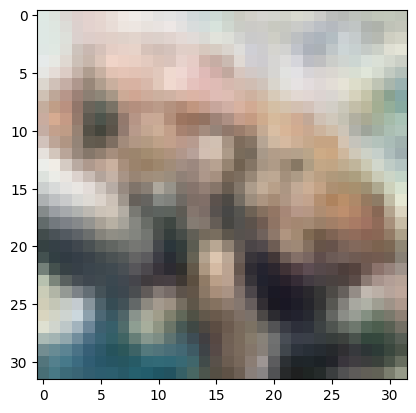

In [9]:
#print augmented iamges
for i in range(0,5):
    plt.imshow(train_gen[0][0][i])
    plt.show()

Train a CNN model of your choice and evaluate on the test data using weighted F1 scores ( Do not just try with a single model use multiple models, for example- one with transfer learning or with a different model architecture) at the end compare the performance of the models, and write what do you infer from the same

# **TRANSFER LEARNING MODEL**

In [10]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, ReLU, GlobalAveragePooling2D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
image_size=32
effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(10, activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
tensorboard = TensorBoard(log_dir = '/logs')
checkpoint = ModelCheckpoint("effnet.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.0001,
                              mode='auto',verbose=1)

In [13]:
# val_batch = next(iter(val_gen))
# print(f"Validation batch: {val_batch}")

In [14]:
# train_batch = next(iter(train_gen))
# val_batch = next(iter(val_gen))
# print(f"Training batch shape: {train_batch[0].shape}, {train_batch[1].shape}")
# print(f"Validation batch shape: {val_batch[0].shape}, {val_batch[1].shape}")

# # Number of samples and batch size
# num_train_samples = len(Y_train)
# num_val_samples = len(Y_test)

# # Calculate steps per epoch
# steps_per_epoch = num_train_samples // batch_size
# validation_steps = num_val_samples // batch_size

In [15]:
epochs = 15

history = model.fit (
    train_gen,
    epochs = epochs,
    validation_data = val_gen,
    validation_steps = len(Y_test)//batch_size,
    steps_per_epoch = len(Y_train)//batch_size,
    callbacks = [tensorboard,checkpoint,reduce_lr],
    verbose = 1,
)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1718123799.673069      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1091/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3872 - loss: 1.8777
Epoch 1: val_accuracy improved from -inf to 0.66086, saving model to effnet.keras
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 173s 82ms/step - accuracy: 0.3875 - loss: 1.8767 - val_accuracy: 0.6609 - val_loss: 1.0395 - learning_rate: 0.0010
Epoch 2/15
   1/1093 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.6562 - loss: 1.0449

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.66086 to 0.66667, saving model to effnet.keras
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6562 - loss: 1.0449 - val_accuracy: 0.6667 - val_loss: 1.1127 - learning_rate: 0.0010
Epoch 3/15
1092/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6134 - loss: 1.1258
Epoch 3: val_accuracy improved from 0.66667 to 0.71321, saving model to effnet.keras
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.6134 - loss: 1.1258 - val_accuracy: 0.7132 - val_loss: 0.8828 - learning_rate: 0.0010
Epoch 4/15
   1/1093 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.5625 - loss: 1.2167
Epoch 4: val_accuracy did not improve from 0.71321
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - accuracy: 0.5625 - loss: 1.2167 - val_accuracy: 0.6250 - val_loss: 1.1107 - learning_rate: 0.0010
Epoch 5/15
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6635 - loss: 1.0110
Epoch 5: val_accuracy improved from 0.71321 to 0.72743, saving model to effnet

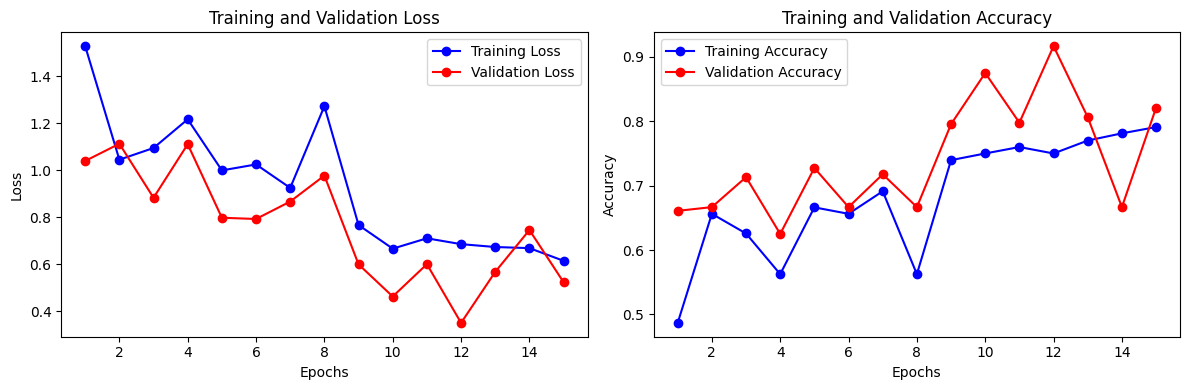

In [16]:
def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 4))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the graphs
plot_training_history(history)

In [17]:
pred = model.predict(X_test_1/255) 
pred = np.argmax(pred, axis=1)
y_test_new = np.argmax(Y_test_1,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step


In [18]:
print(classification_report(y_test_new, pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.83      0.95      0.89      1000
           2       0.80      0.73      0.77      1000
           3       0.73      0.62      0.67      1000
           4       0.82      0.75      0.78      1000
           5       0.79      0.68      0.73      1000
           6       0.68      0.96      0.80      1000
           7       0.89      0.85      0.87      1000
           8       0.91      0.89      0.90      1000
           9       0.86      0.89      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



# **NORMAL CNN MODEL (USING NEURAL NETWORK)**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import f1_score
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [20]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(32, 32, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=10, activation='softmax')
    ])
    
    return model

In [21]:
model = create_model()
print(model.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,474 (540.91 KB)

 Trainable params: 138,026 (539.16 KB)

 Non-trainable params: 448 (1.75 KB)

None


In [22]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [23]:
history = model.fit(train_gen, epochs=50, validation_data=val_gen,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/50
1094/1094 - 38s - 35ms/step - accuracy: 0.3489 - loss: 1.8046 - val_accuracy: 0.4055 - val_loss: 1.6098 - learning_rate: 0.0010
Epoch 2/50
1094/1094 - 22s - 20ms/step - accuracy: 0.4515 - loss: 1.5352 - val_accuracy: 0.5121 - val_loss: 1.3775 - learning_rate: 0.0010
Epoch 3/50
1094/1094 - 21s - 19ms/step - accuracy: 0.4935 - loss: 1.4181 - val_accuracy: 0.5571 - val_loss: 1.2808 - learning_rate: 0.0010
Epoch 4/50
1094/1094 - 21s - 19ms/step - accuracy: 0.5251 - loss: 1.3484 - val_accuracy: 0.4117 - val_loss: 2.1705 - learning_rate: 0.0010
Epoch 5/50
1094/1094 - 21s - 19ms/step - accuracy: 0.5449 - loss: 1.2981 - val_accuracy: 0.6005 - val_loss: 1.1494 - learning_rate: 0.0010
Epoch 6/50
1094/1094 - 21s - 19ms/step - accuracy: 0.5593 - loss: 1.2600 - val_accuracy: 0.5975 - val_loss: 1.1510 - learning_rate: 0.0010
Epoch 7/50
1094/1094 - 21s - 19ms/step - accuracy: 0.5722 - loss: 1.2260 - val_accuracy: 0.5814 - val_loss: 1.2140 - learning_rate: 0.0010
Epoch 8/50
1094/1094 - 22s 

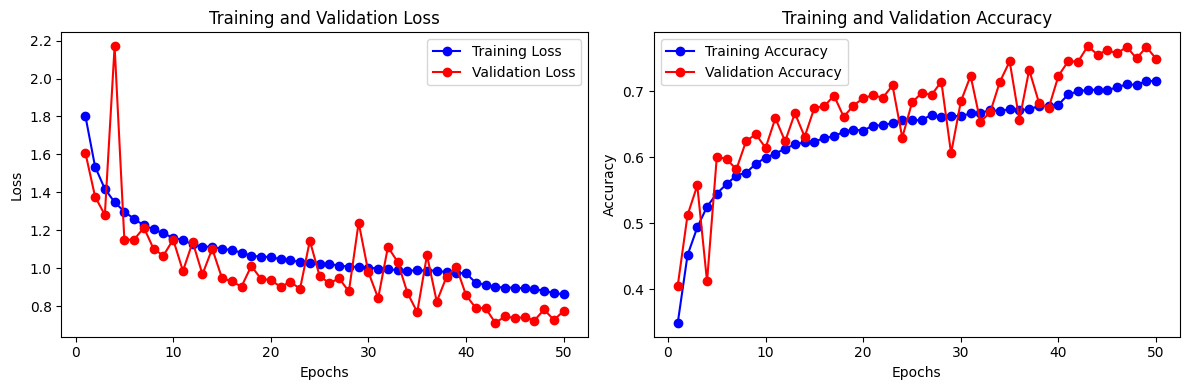

In [24]:
def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 4))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the graphs
plot_training_history(history)

In [25]:
Y_pred = model.predict(X_test_1/255)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test_1, axis=1)

f1_model = f1_score(Y_test_classes, Y_pred_classes, average='weighted')
print("Weighted F1 Score:", f1_model)

print(classification_report(Y_test_classes, Y_pred_classes, target_names=[str(i) for i in range(10)]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Weighted F1 Score: 0.7369257146841994
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1000
           1       0.86      0.91      0.88      1000
           2       0.81      0.53      0.64      1000
           3       0.68      0.46      0.55      1000
           4       0.74      0.68      0.71      1000
           5       0.75      0.58      0.66      1000
           6       0.59      0.92      0.72      1000
           7       0.74      0.83      0.78      1000
           8       0.85      0.84      0.85      1000
           9       0.71      0.90      0.79      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000

